In [1]:
# pip install numba --upgrade
# pip install pygraphviz
import sys
sys.path.insert(0, "/Users/yhhan/git/aiclass/0.Professor/")
#sys.path.insert(0, "C:\\Users\\admin\\git\\aiclass\\0.Professor\\")

import tensorflux.graph as tfg
import tensorflux.CNN as tfn
import tensorflux.enums as tfe
import datasource.mnist as mnist
import tensorflux.functions as tff
import math
import numba
print(numba.__version__)
%matplotlib inline

0.35.0


In [2]:
"""
    (conv0 - batch_normal0 - relu0 - dropout0) - pool1 - 
    (conv2 - batch_normal2 - relu2 - dropout2) - pool3 - reshape -
    (affine4 - batch_normal4 - relu4 - dropout4) - affine5 - softmax (output)
"""

input_dim = (1, 28, 28)
cnn_param_list = [
    {'type': 'conv', 'filter_num': 3, 'filter_h': 3, 'filter_w': 3, 'pad': 1, 'stride': 1},
    {'type': 'pooling', 'filter_h': 2, 'filter_w': 2, 'stride': 2},
    {'type': 'conv', 'filter_num': 3, 'filter_h': 3, 'filter_w': 3, 'pad': 1, 'stride': 1},
    {'type': 'pooling', 'filter_h': 2, 'filter_w': 2, 'stride': 2},
]
fc_hidden_size = 64
output_size = 10

dropout_ratio0 = 0.5
dropout_ratio2 = 0.5
dropout_ratio4 = 0.5

x = tfg.Placeholder(name="x")
target = tfg.Placeholder(name="target")

n = tfn.CNN(
    input_dim=input_dim,
    cnn_param_list=cnn_param_list,
    fc_hidden_size=fc_hidden_size,
    output_size=output_size,
    input_node=x,
    target_node=target,
    use_batch_normalization=True,
    conv_initializer=tfe.Initializer.Conv_Xavier_Normal.value,
    initializer=tfe.Initializer.Normal.value,
    init_sd=0.01,
    # initializer=tfe.Initializer.Xavier.value,
    activator=tfe.Activator.ReLU.value,
    optimizer=tfe.Optimizer.Adam.value,
    learning_rate=0.001
)

Convolutional Neural Network Model - ID: MVQVMLHV
Data Size: (1, 28, 28)
         |
[Convolution Layer 0]
Param Key: W0, Shape: (3, 1, 3, 3)
Param Key: b0, Shape: (3,)
Data Size: (3, 28, 28)
         |
[Batch Normalization 0]
Param Key: gamma0, Shape: (1, 1)
Param Key: beta0, Shape: (1, 1)
Data Size: (3, 28, 28)
         |
[Activation Layer 0]
Data Size: (3, 28, 28)
         |
[Pooling Layer 1]
Data Size: (3, 14, 14)
         |
[Convolution Layer 2]
Param Key: W2, Shape: (3, 3, 3, 3)
Param Key: b2, Shape: (3,)
Data Size: (3, 14, 14)
         |
[Batch Normalization 2]
Param Key: gamma2, Shape: (1, 1)
Param Key: beta2, Shape: (1, 1)
Data Size: (3, 14, 14)
         |
[Activation Layer 2]
Data Size: (3, 14, 14)
         |
[Pooling Layer 3]
Data Size: (3, 7, 7)
         |
[Reshape Layer]
Data Size: 147
         |
[Affine Layer 4]
Param Key: W4, Shape: (147, 64)
Param Key: b4, Shape: (64,)
Data Size: 64
         |
[Batch Normalization 4]
Param Key: gamma4, Shape: (1, 1)
Param Key: beta4, Sha

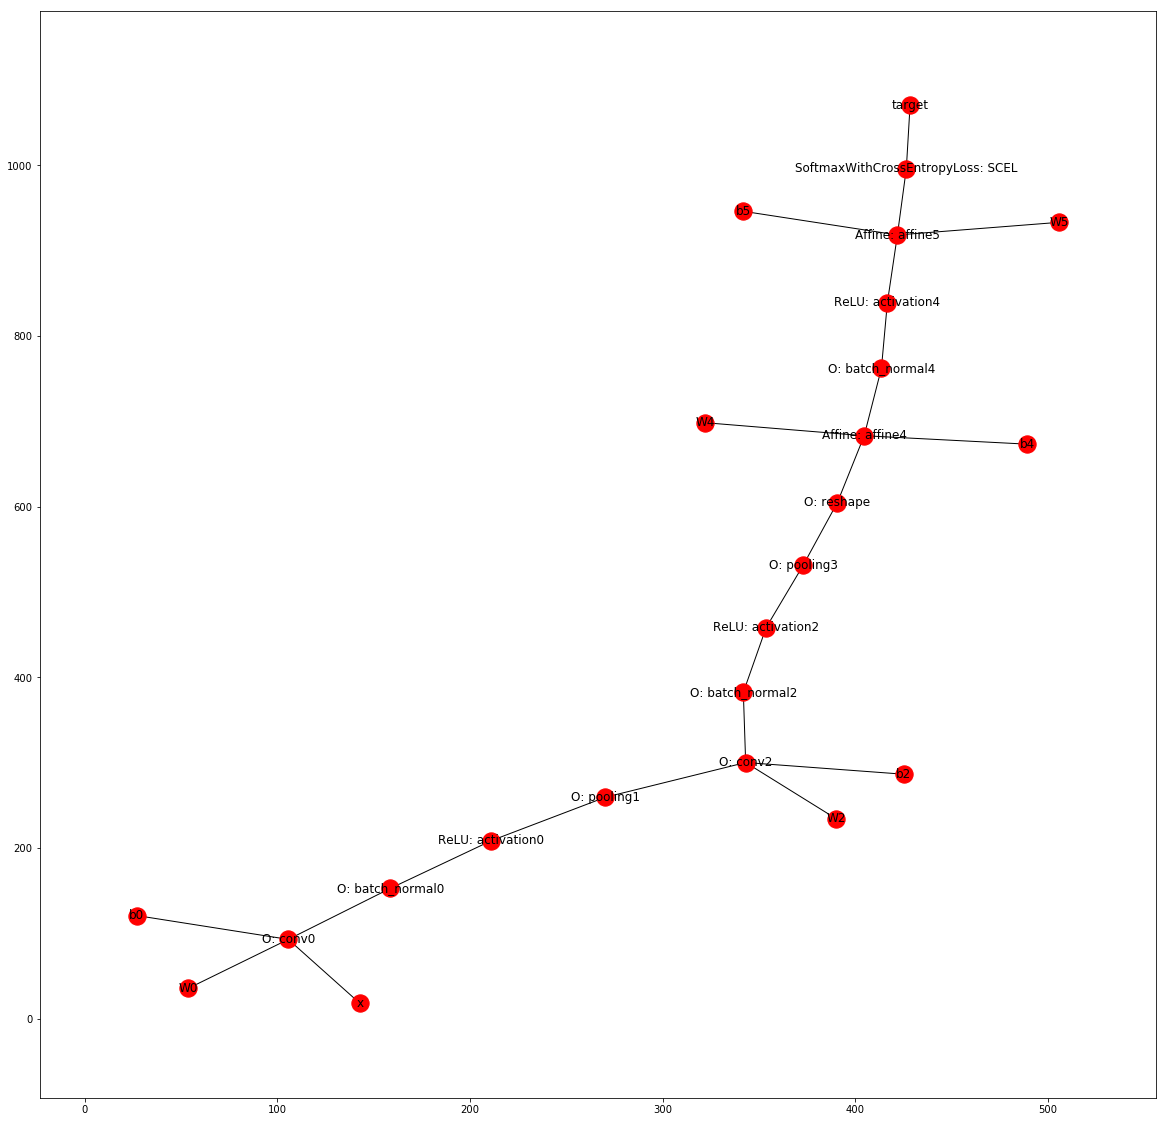

In [3]:
n.draw_and_show(figsize=(20, 20))

[Convolution Layer 0]
(3, 3)
(3, 3)
(3, 3)


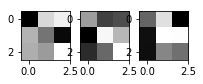

[Convolution Layer 2]
(3, 3, 3)
(3, 3, 3)
(3, 3, 3)


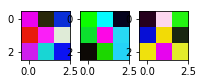

In [4]:
n.draw_filters(figsize=(20, 5))

In [5]:
data = mnist.MNIST_Data(validation_size=5000, n_splits=12, is_onehot_target=True, cnn=True)
#data = mnist.Fashion_MNIST_Data(validation_size=5000, n_splits=12, is_onehot_target=True, cnn=True)

(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)


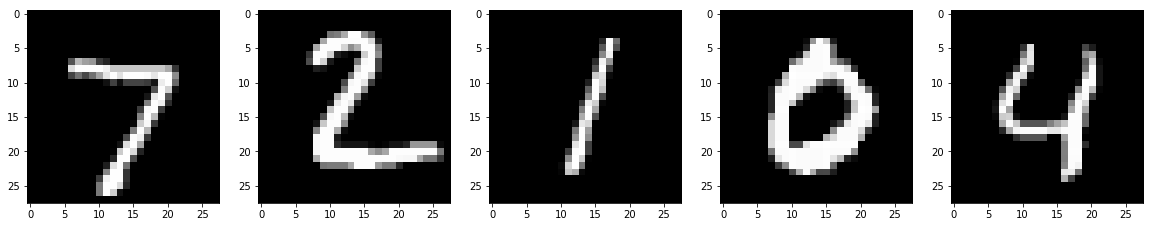

[Convolution Layer: conv0]
(28, 28, 3)
(28, 28, 3)
(28, 28, 3)
(28, 28, 3)
(28, 28, 3)


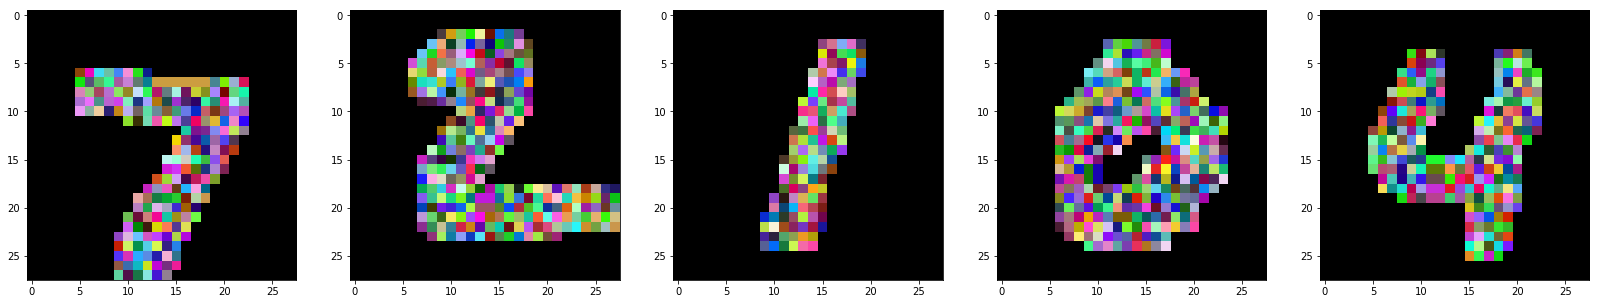

[Activation Layer: activation0]
(28, 28, 3)
(28, 28, 3)
(28, 28, 3)
(28, 28, 3)
(28, 28, 3)


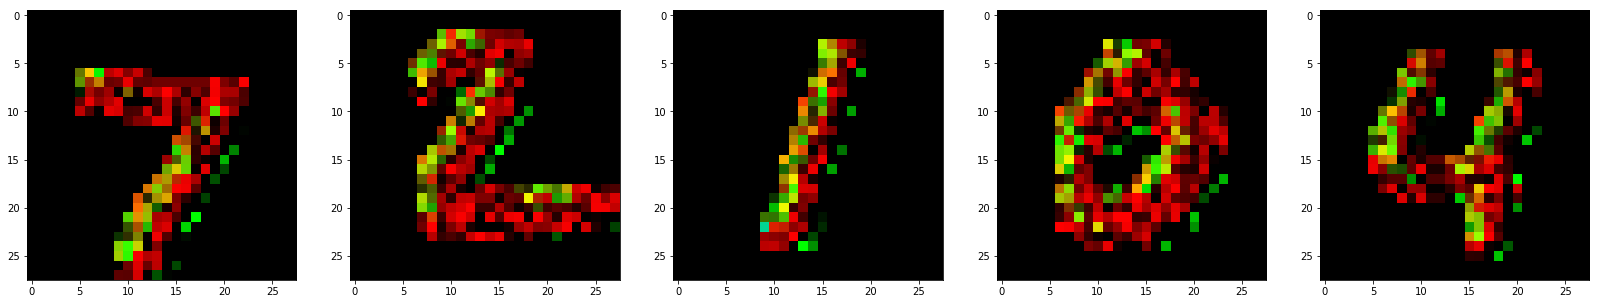

[Pooling Layer: pooling1]
(14, 14, 3)
(14, 14, 3)
(14, 14, 3)
(14, 14, 3)
(14, 14, 3)


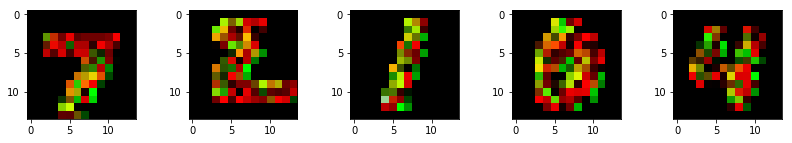

[Convolution Layer: conv2]
(14, 14, 3)
(14, 14, 3)
(14, 14, 3)
(14, 14, 3)
(14, 14, 3)


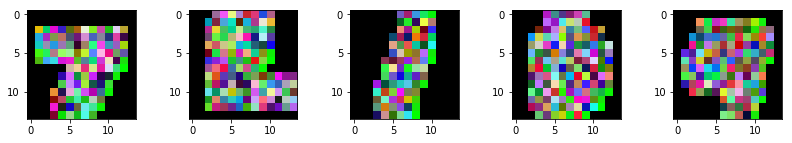

[Activation Layer: activation2]
(14, 14, 3)
(14, 14, 3)
(14, 14, 3)
(14, 14, 3)
(14, 14, 3)


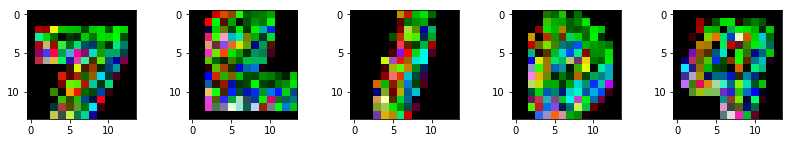

[Pooling Layer: pooling3]
(7, 7, 3)
(7, 7, 3)
(7, 7, 3)
(7, 7, 3)
(7, 7, 3)


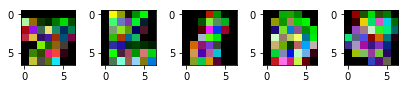

[Pooling Layer: reshape]
(1, 147)
(1, 147)
(1, 147)
(1, 147)
(1, 147)


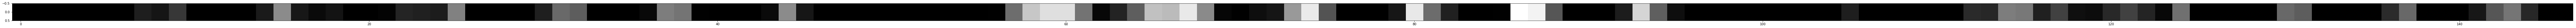

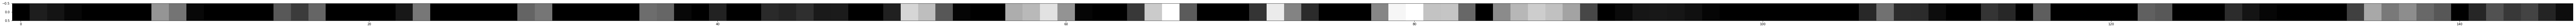

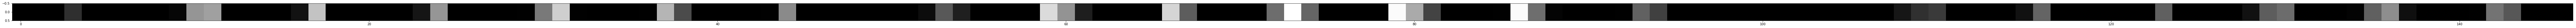

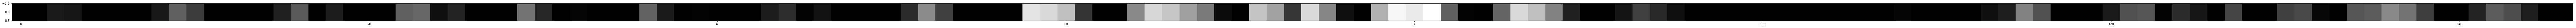

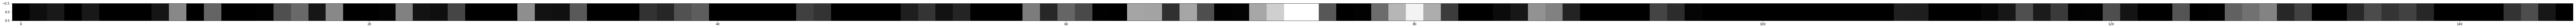

[Affine Layer: affine4]
(1, 64)
(1, 64)
(1, 64)
(1, 64)
(1, 64)


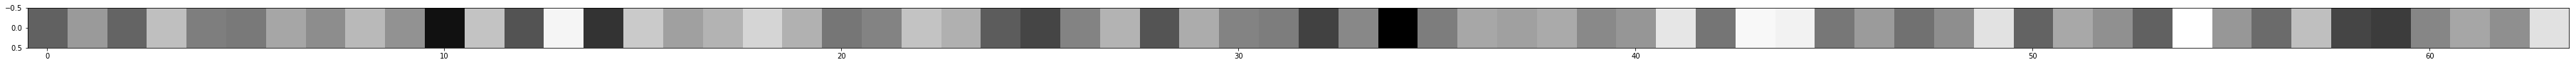

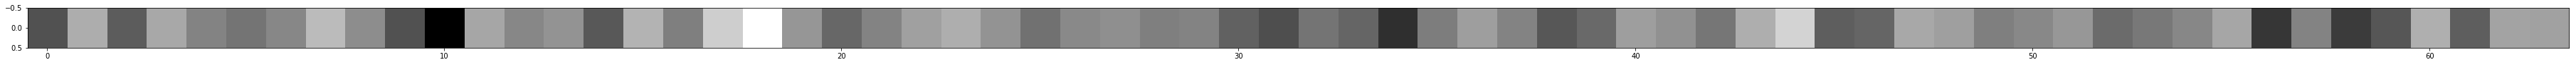

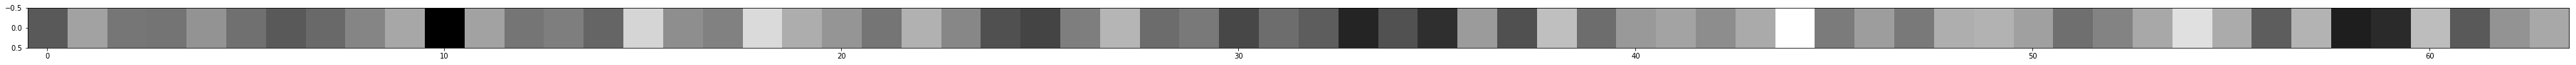

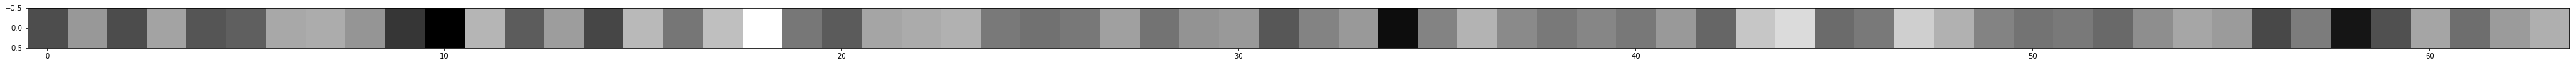

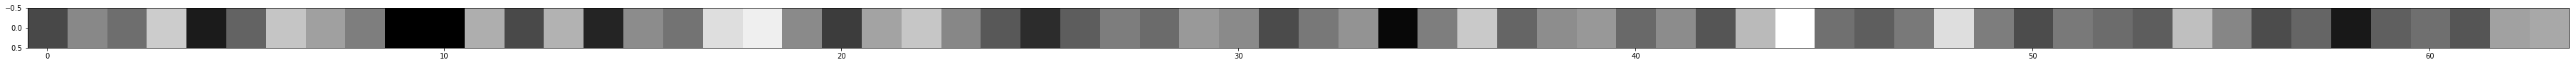

[Affine Layer: affine5]
(1, 10)
(1, 10)
(1, 10)
(1, 10)
(1, 10)


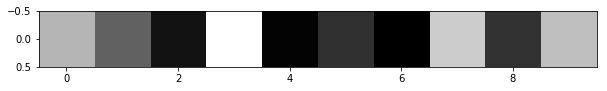

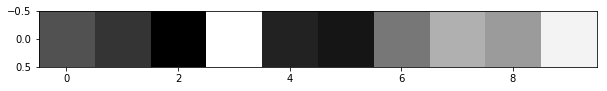

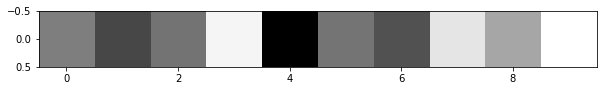

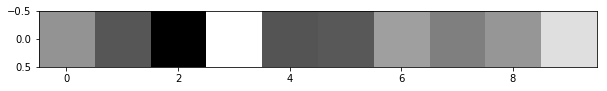

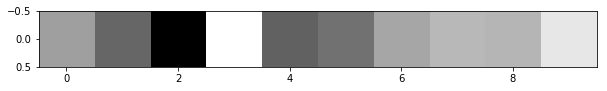

[Softmax Layer]
(1, 10) : [[  4.082e-03   8.074e-06   2.354e-08   9.660e-01   7.900e-09   2.373e-07
    5.944e-09   2.190e-02   2.561e-07   7.966e-03]]
(1, 10) : [[  1.989e-09   7.712e-11   1.780e-13   7.959e-01   8.567e-12   2.009e-12
    1.383e-07   9.655e-05   8.738e-06   2.040e-01]]
(1, 10) : [[  4.800e-05   8.472e-07   2.065e-05   2.838e-01   4.404e-09   2.310e-05
    1.702e-06   8.923e-02   8.941e-04   6.260e-01]]
(1, 10) : [[  1.381e-09   1.303e-14   9.455e-22   9.981e-01   8.347e-15   1.909e-14
    1.147e-08   2.650e-11   2.077e-09   1.948e-03]]
(1, 10) : [[  4.963e-07   8.684e-11   1.622e-17   9.770e-01   4.407e-11   4.876e-10
    1.338e-06   2.160e-05   1.320e-05   2.293e-02]]


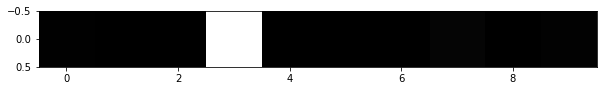

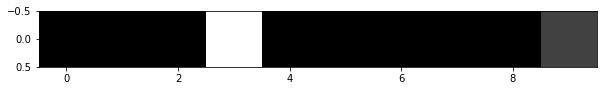

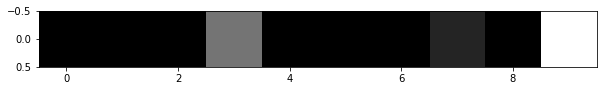

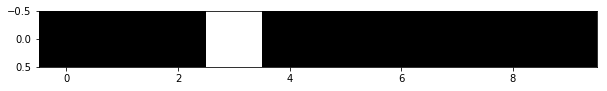

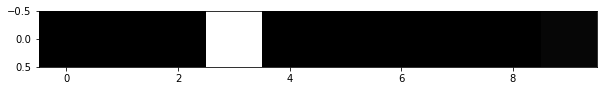

In [6]:
n.draw_filtered_images(test_inputs=data.test_input[:5], figsize=(20, 5))

In [7]:
forward_final_output = n.feed_forward(input_data=data.test_input, is_numba=False)
#print(forward_final_output.shape)
print("Initial Accuracy", tff.accuracy(forward_final_output, data.test_target))

batch_size = 1000
#%timeit -n1 -r1 n.learning(
n.learning(
    max_epoch=10, 
    data=data, 
    batch_size=batch_size, 
    print_period=1, 
    is_numba=False, 
    verbose=False
)
data.reset_kfold()

forward_final_output = n.feed_forward(input_data=data.test_input, is_numba=False)
print("Post-learning Accuracy", tff.accuracy(forward_final_output, data.test_target))

Initial Accuracy 0.0995
-- Learning Started --
Epoch   0 Completed - Train Error:2.30316 - Validation Error:2.30275 - Test Accuracy:0.08680 <== Minimal Val. Error
Fold:  0
Epoch   1 Completed - Train Error:2.30161 - Validation Error:2.30160 - Test Accuracy:0.11360 <== Minimal Val. Error
Epoch   2 Completed - Train Error:2.30044 - Validation Error:2.30070 - Test Accuracy:0.11650 <== Minimal Val. Error
Epoch   3 Completed - Train Error:2.25198 - Validation Error:2.25121 - Test Accuracy:0.20170 <== Minimal Val. Error
Epoch   4 Completed - Train Error:1.98651 - Validation Error:1.97257 - Test Accuracy:0.45960 <== Minimal Val. Error
Epoch   5 Completed - Train Error:1.57977 - Validation Error:1.54880 - Test Accuracy:0.64980 <== Minimal Val. Error
Epoch   6 Completed - Train Error:1.15729 - Validation Error:1.16408 - Test Accuracy:0.68340 <== Minimal Val. Error
Epoch   7 Completed - Train Error:0.92739 - Validation Error:0.91890 - Test Accuracy:0.71980 <== Minimal Val. Error
Epoch   8 Comple

/Users/yhhan/git/aiclass/0.Professor/tensorflux/functions.py:49: RuntimeWarning: invalid value encountered in true_divide
  y = np.exp(x) / np.sum(np.exp(x), axis=0)


Epoch   1 Completed - Train Error:0.53174 - Validation Error:   nan - Test Accuracy:0.80680
Epoch   2 Completed - Train Error:0.50289 - Validation Error:   nan - Test Accuracy:0.80140
Epoch   3 Completed - Train Error:0.53463 - Validation Error:   nan - Test Accuracy:0.79290
Epoch   4 Completed - Train Error:0.44899 - Validation Error:   nan - Test Accuracy:0.80640
Epoch   5 Completed - Train Error:0.52916 - Validation Error:   nan - Test Accuracy:0.80480
Epoch   6 Completed - Train Error:0.48488 - Validation Error:   nan - Test Accuracy:0.80430
Epoch   7 Completed - Train Error:0.47741 - Validation Error:   nan - Test Accuracy:0.80670
Epoch   8 Completed - Train Error:0.49039 - Validation Error:   nan - Test Accuracy:0.80740
Epoch   9 Completed - Train Error:0.50717 - Validation Error:   nan - Test Accuracy:0.80660
Epoch  10 Completed - Train Error:0.51174 - Validation Error:   nan - Test Accuracy:0.80770

[Best Epoch (based on Validation Error) and Its Performance]
Global Epoch: 81 (

In [8]:
print("Epoch:{:3d}, Min Train Error:{:7.5f}, Min Validation Error:{:7.5f}, Test Accuracy:{:7.5f}".format(
    n.min_validation_error_epoch,
    n.min_train_error,
    n.min_validation_error,
    n.test_accuracy_at_min_validation_error_epoch
))

print("Mean of Min Validation Error For All Folds:{:7.5f}".format(n.mean_min_validation_error_for_all_folds))

Epoch:111, Min Train Error:0.44947, Min Validation Error:0.43273, Test Accuracy:0.80800
Mean of Min Validation Error For All Folds:0.56634


[Convolution Layer 0]
(3, 3)
(3, 3)
(3, 3)


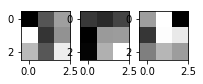

[Convolution Layer 2]
(3, 3, 3)
(3, 3, 3)
(3, 3, 3)


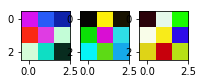

In [9]:
n.draw_filters(figsize=(20, 5))

(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)


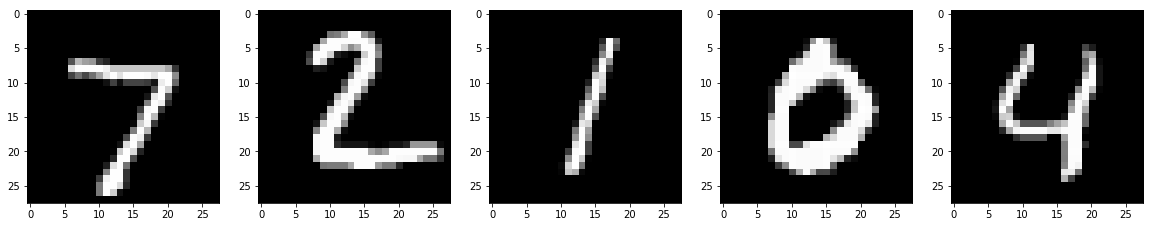

[Convolution Layer: conv0]
(28, 28, 3)
(28, 28, 3)
(28, 28, 3)
(28, 28, 3)
(28, 28, 3)


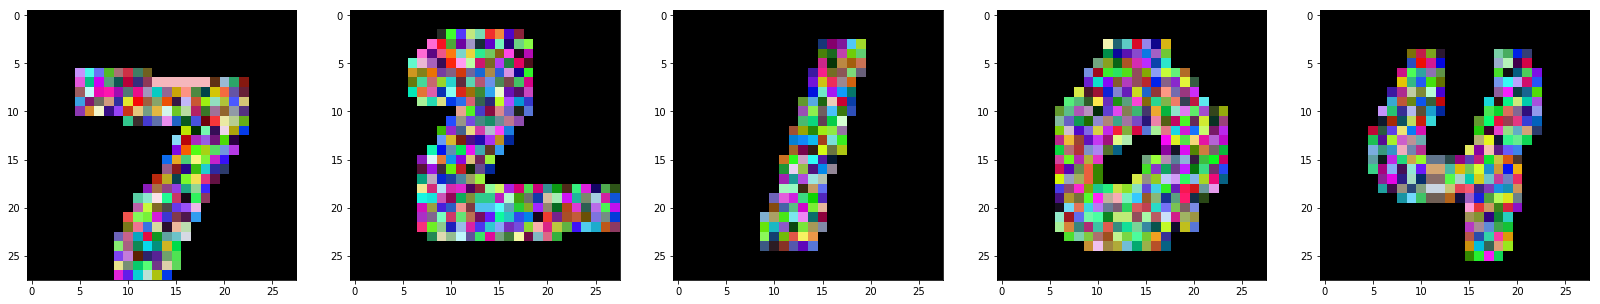

[Activation Layer: activation0]
(28, 28, 3)
(28, 28, 3)
(28, 28, 3)
(28, 28, 3)
(28, 28, 3)


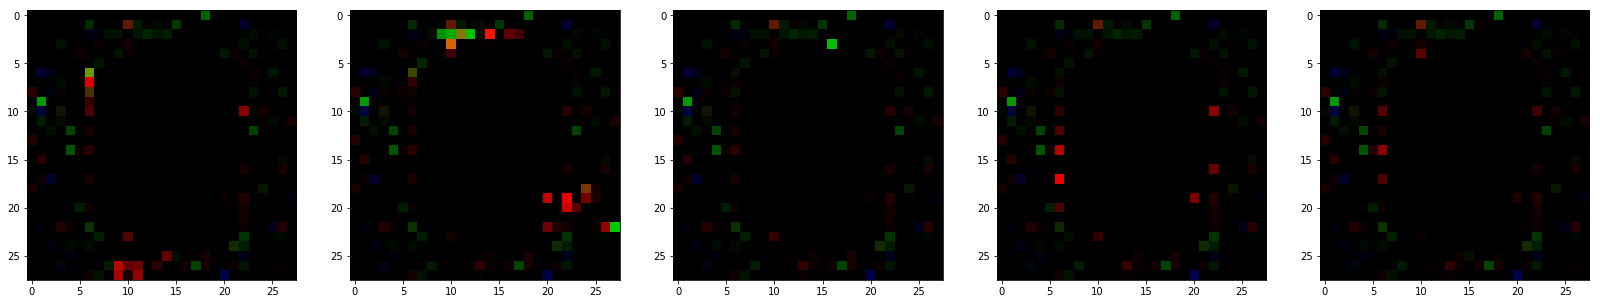

[Pooling Layer: pooling1]
(14, 14, 3)
(14, 14, 3)
(14, 14, 3)
(14, 14, 3)
(14, 14, 3)


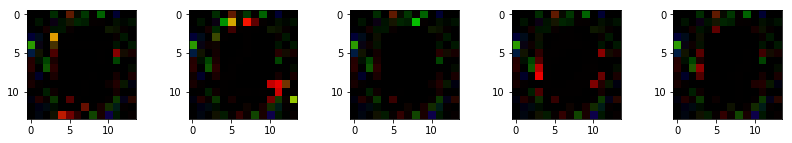

[Convolution Layer: conv2]
(14, 14, 3)
(14, 14, 3)
(14, 14, 3)
(14, 14, 3)
(14, 14, 3)


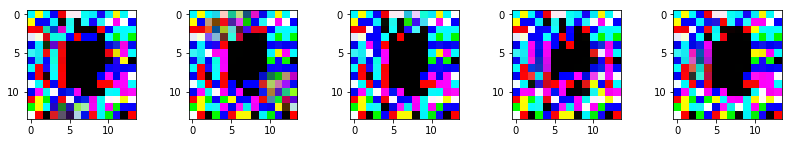

[Activation Layer: activation2]
(14, 14, 3)
(14, 14, 3)
(14, 14, 3)
(14, 14, 3)
(14, 14, 3)


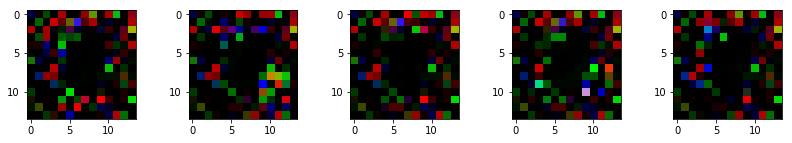

[Pooling Layer: pooling3]
(7, 7, 3)
(7, 7, 3)
(7, 7, 3)
(7, 7, 3)
(7, 7, 3)


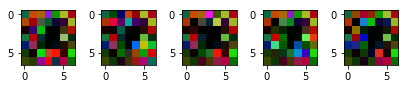

[Pooling Layer: reshape]
(1, 147)
(1, 147)
(1, 147)
(1, 147)
(1, 147)


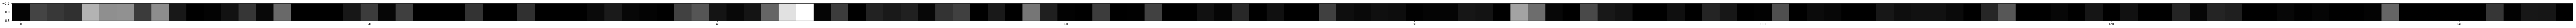

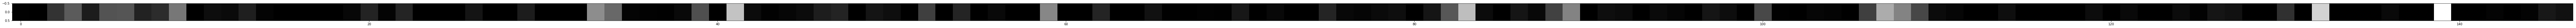

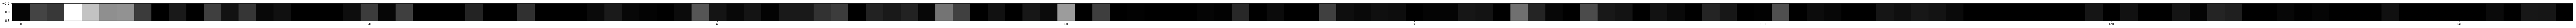

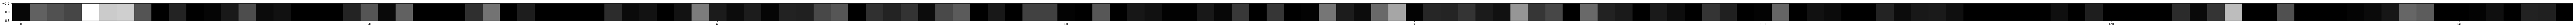

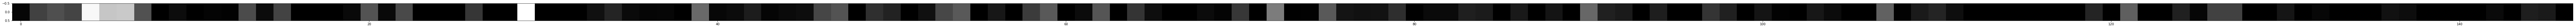

[Affine Layer: affine4]
(1, 64)
(1, 64)
(1, 64)
(1, 64)
(1, 64)


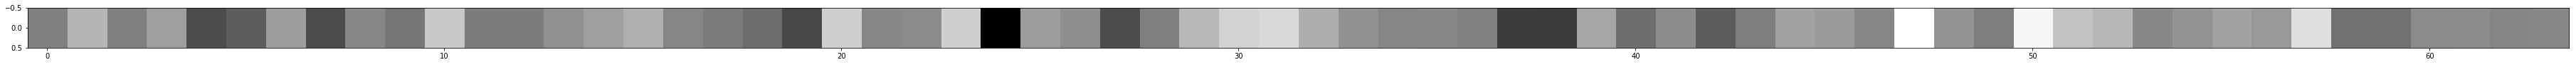

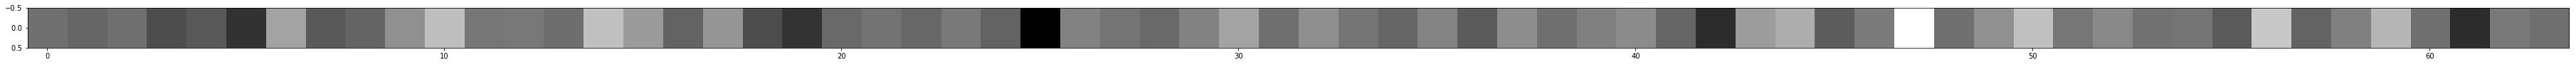

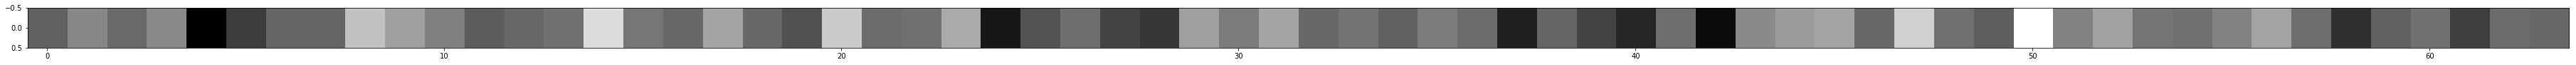

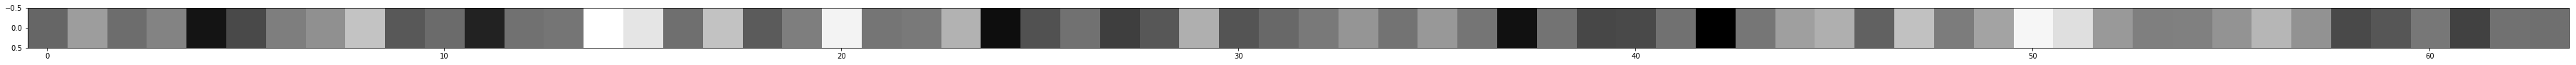

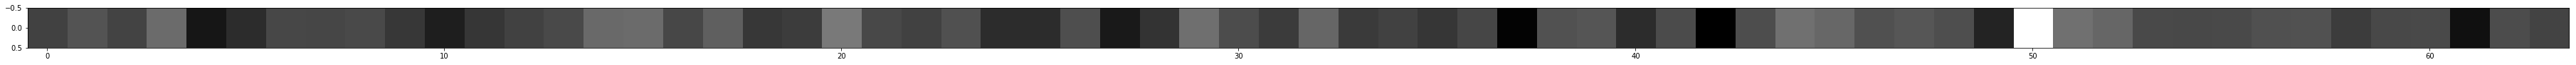

[Affine Layer: affine5]
(1, 10)
(1, 10)
(1, 10)
(1, 10)
(1, 10)


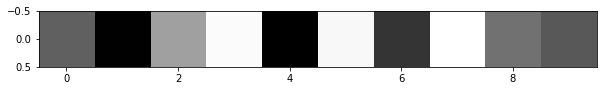

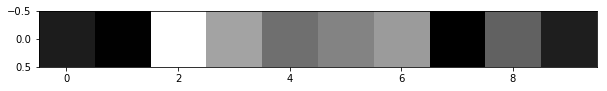

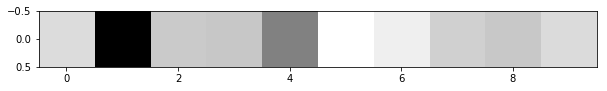

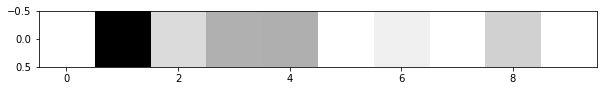

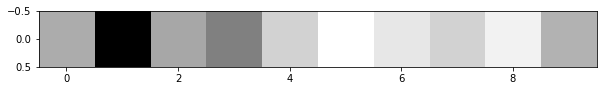

[Softmax Layer]
(1, 10) : [[  8.733e-089   1.481e-141   8.555e-054   2.559e-003   2.172e-142
    8.898e-005   5.102e-113   9.974e-001   4.255e-079   3.113e-093]]
(1, 10) : [[  1.815e-193   3.063e-216   1.000e+000   6.081e-079   2.249e-123
    1.974e-105   8.487e-086   1.354e-217   5.585e-135   1.603e-191]]
(1, 10) : [[  1.901e-018   1.183e-127   2.402e-027   6.112e-029   2.141e-063
    1.000e+000   5.385e-009   3.184e-024   4.499e-028   4.620e-019]]
(1, 10) : [[  2.075e-001   2.539e-126   6.671e-019   6.932e-040   1.434e-040
    1.628e-001   1.041e-008   4.183e-001   5.616e-024   2.114e-001]]
(1, 10) : [[  2.790e-040   6.369e-122   2.118e-042   3.567e-061   3.500e-022
    1.000e+000   2.355e-012   1.990e-022   6.000e-007   1.340e-037]]


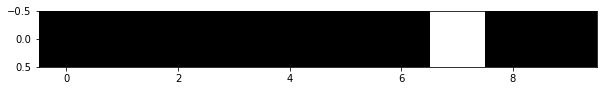

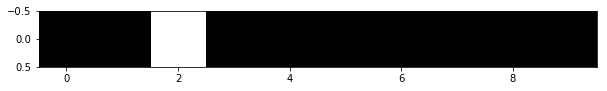

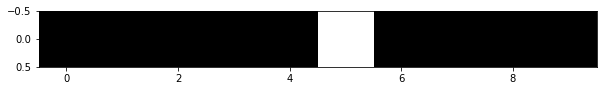

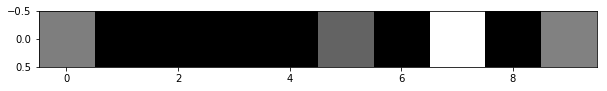

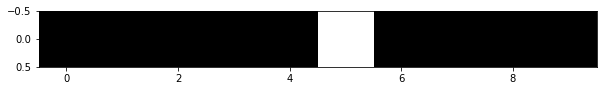

In [10]:
n.draw_filtered_images(test_inputs=data.test_input[:5], figsize=(20, 5))

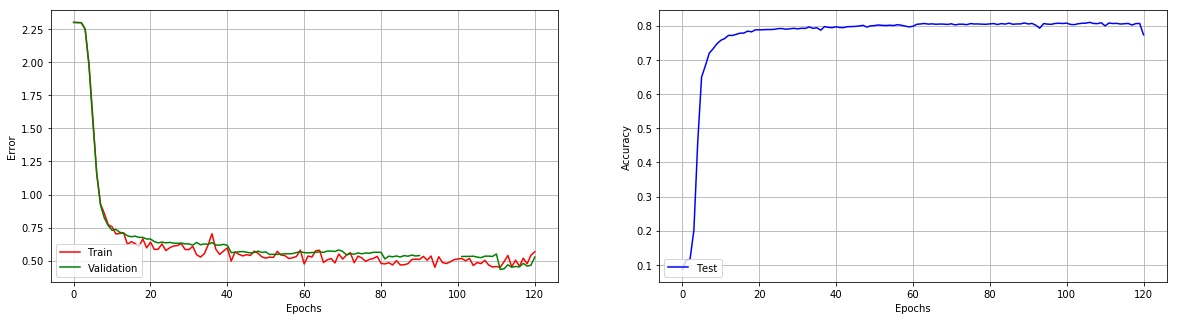

In [11]:
n.draw_error_values_and_accuracy(figsize=(20, 5))

False Prediction Index: 2, Prediction: Five, Ground Truth: One
False Prediction Index: 3, Prediction: Seven, Ground Truth: Zero
False Prediction Index: 4, Prediction: Five, Ground Truth: Four
False Prediction Index: 5, Prediction: Five, Ground Truth: One
False Prediction Index: 6, Prediction: Five, Ground Truth: Four


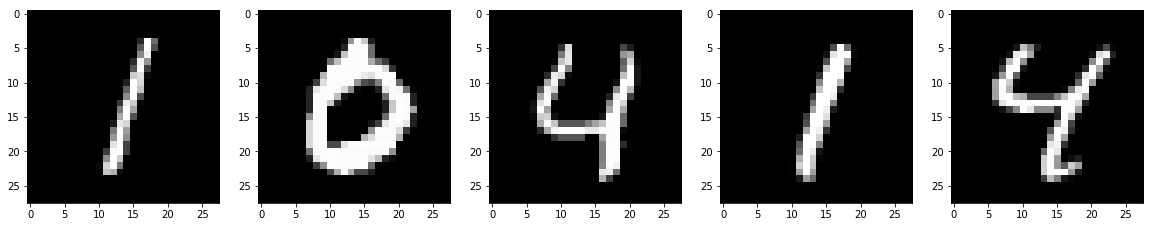

In [12]:
n.draw_false_prediction(data.test_input, data.test_target, data.labels, num=5, figsize=(20, 5))

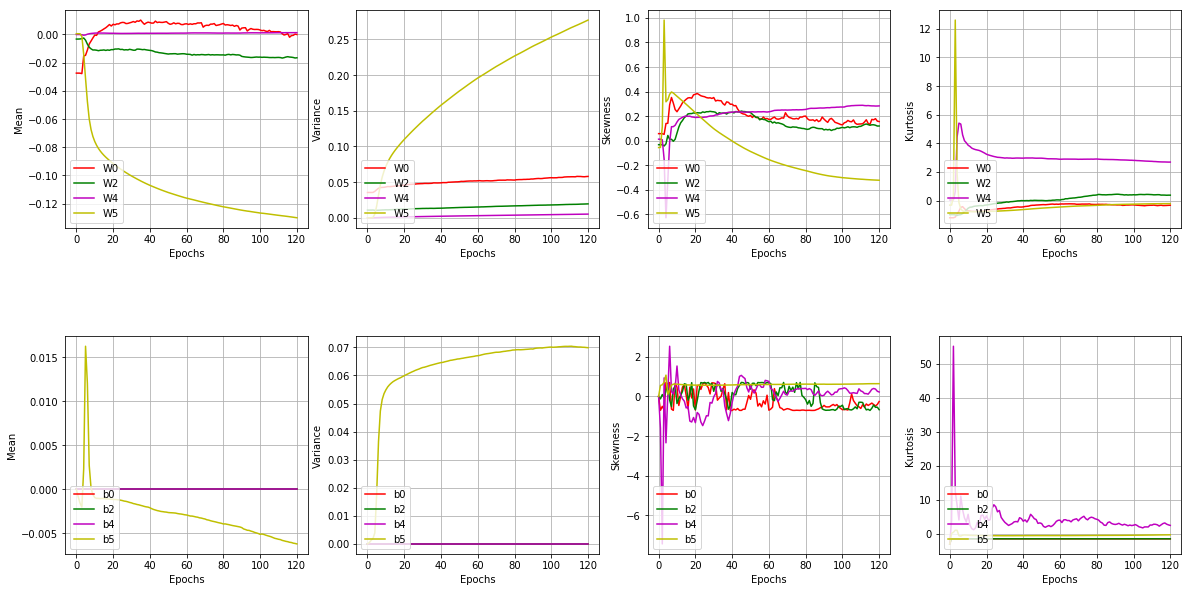

In [13]:
n.draw_param_description(figsize=(20, 10))

[conv0]
[batch_normal0]
[activation0]
[pooling1]
[conv2]
[batch_normal2]
[activation2]
[pooling3]
[reshape]
[affine4]
[batch_normal4]
[activation4]
[affine5]


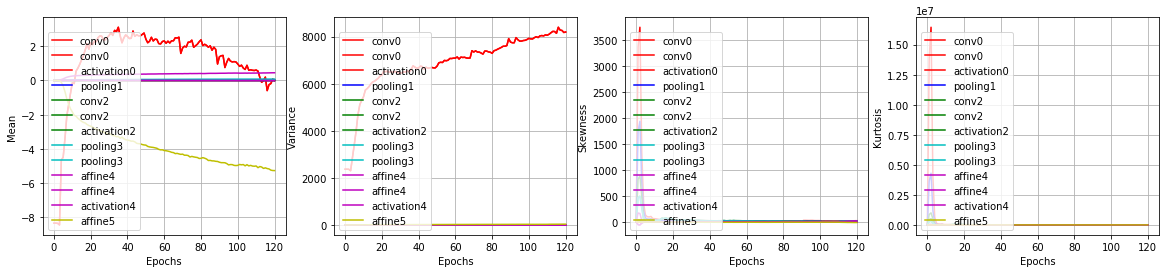

In [14]:
n.draw_output_description(figsize=(20, 10))